# Part 1: Data preprocessing

## Importing the dataset from Kaggle to Colab

Dataset link: https://www.kaggle.com/datasets/patelprashant/employee-attrition/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('ea.csv')

## Data Exploration

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.shape

(1470, 35)

In [5]:
# check the columns
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# drop below columns (makes no sence for our model)
# 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'

In [7]:
# only one value
dataset['StandardHours'].unique()

array([80])

In [8]:
# only one value
dataset['Over18'].unique()

array(['Y'], dtype=object)

In [9]:
# only one value
dataset['EmployeeCount'].unique()

array([1])

In [10]:
dataset.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], inplace=True)

In [11]:
dataset.shape

(1470, 31)

In [12]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [13]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [14]:
len(dataset.select_dtypes(include=['object']).columns)

8

In [15]:
# columns with numerical values
dataset.select_dtypes(include=['int64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
len(dataset.select_dtypes(include=['int64']).columns)

23

In [17]:
# statistical summary
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Dealing with missing values

In [18]:
# check if there are any null values
dataset.isnull().values.any()

False

In [19]:
# check how many null values
dataset.isnull().values.sum()

0

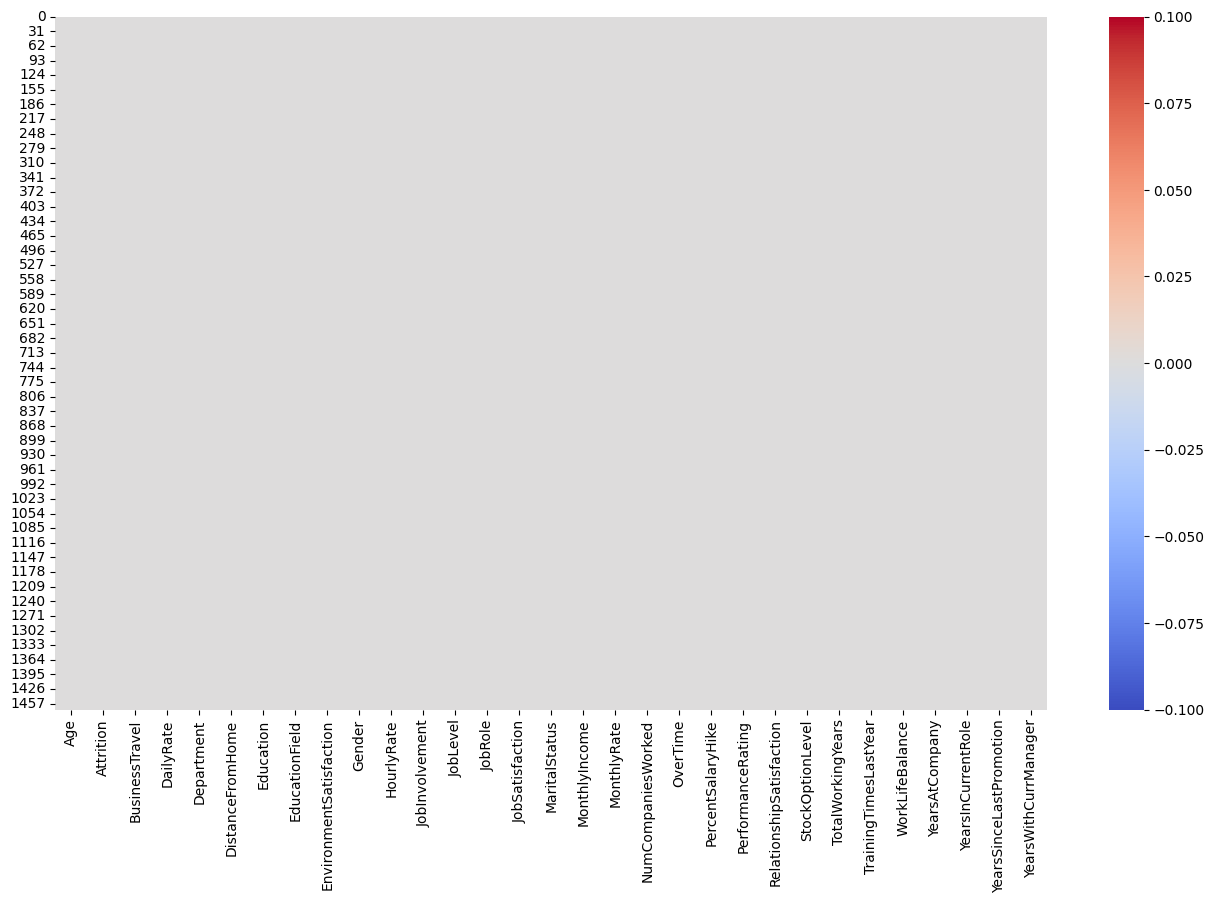

In [20]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data=dataset.isnull(), cmap='coolwarm')
plt.show()

## Countplot

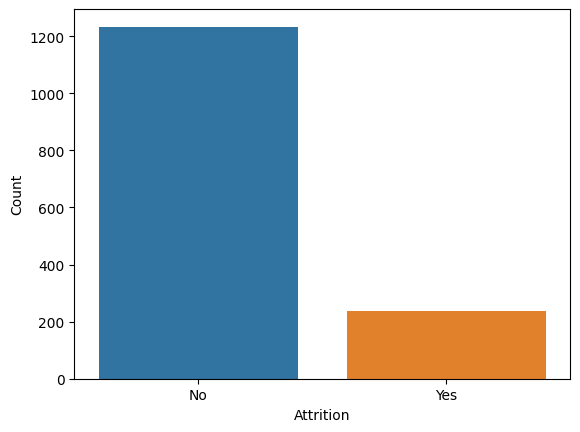

In [21]:
# Define a dictionary to map 'Yes' to 1 and 'No' to 0
attrition_mapping = {'Yes': 1, 'No': 0}

# Use the map function to convert the 'Attrition' column
dataset['Attrition'] = dataset['Attrition'].map(attrition_mapping)

# Create the count plot
sns.countplot(data=dataset, x='Attrition', label='Count')

# Set labels for the x-axis
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plot
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [22]:
# Attrition (Yes)
(dataset.Attrition == 1).sum()

237

In [23]:
# Attrition (No)
(dataset.Attrition == 0).sum()

1233

<Axes: xlabel='Age', ylabel='count'>

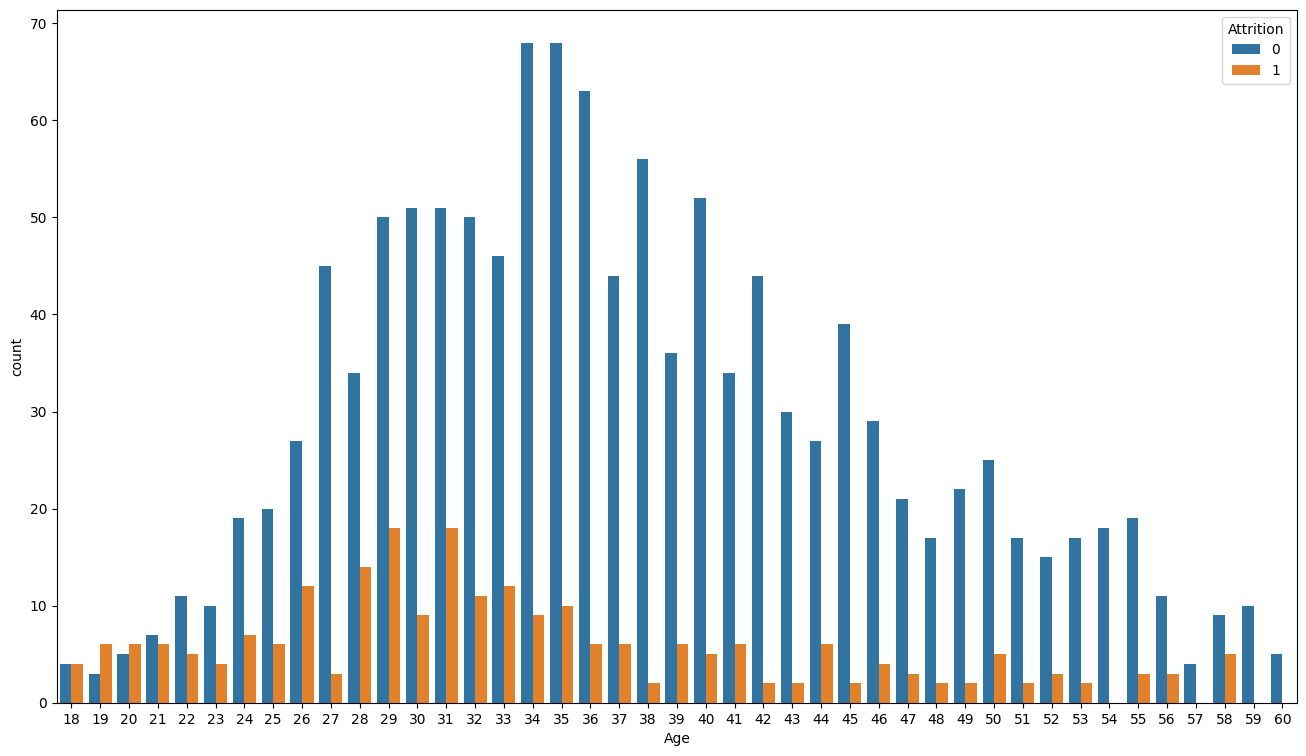

In [24]:
plt.figure(figsize=[16, 9])
sns.countplot(x='Age', hue='Attrition', data=dataset)

In [25]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='JobSatisfaction', ylabel='count'>

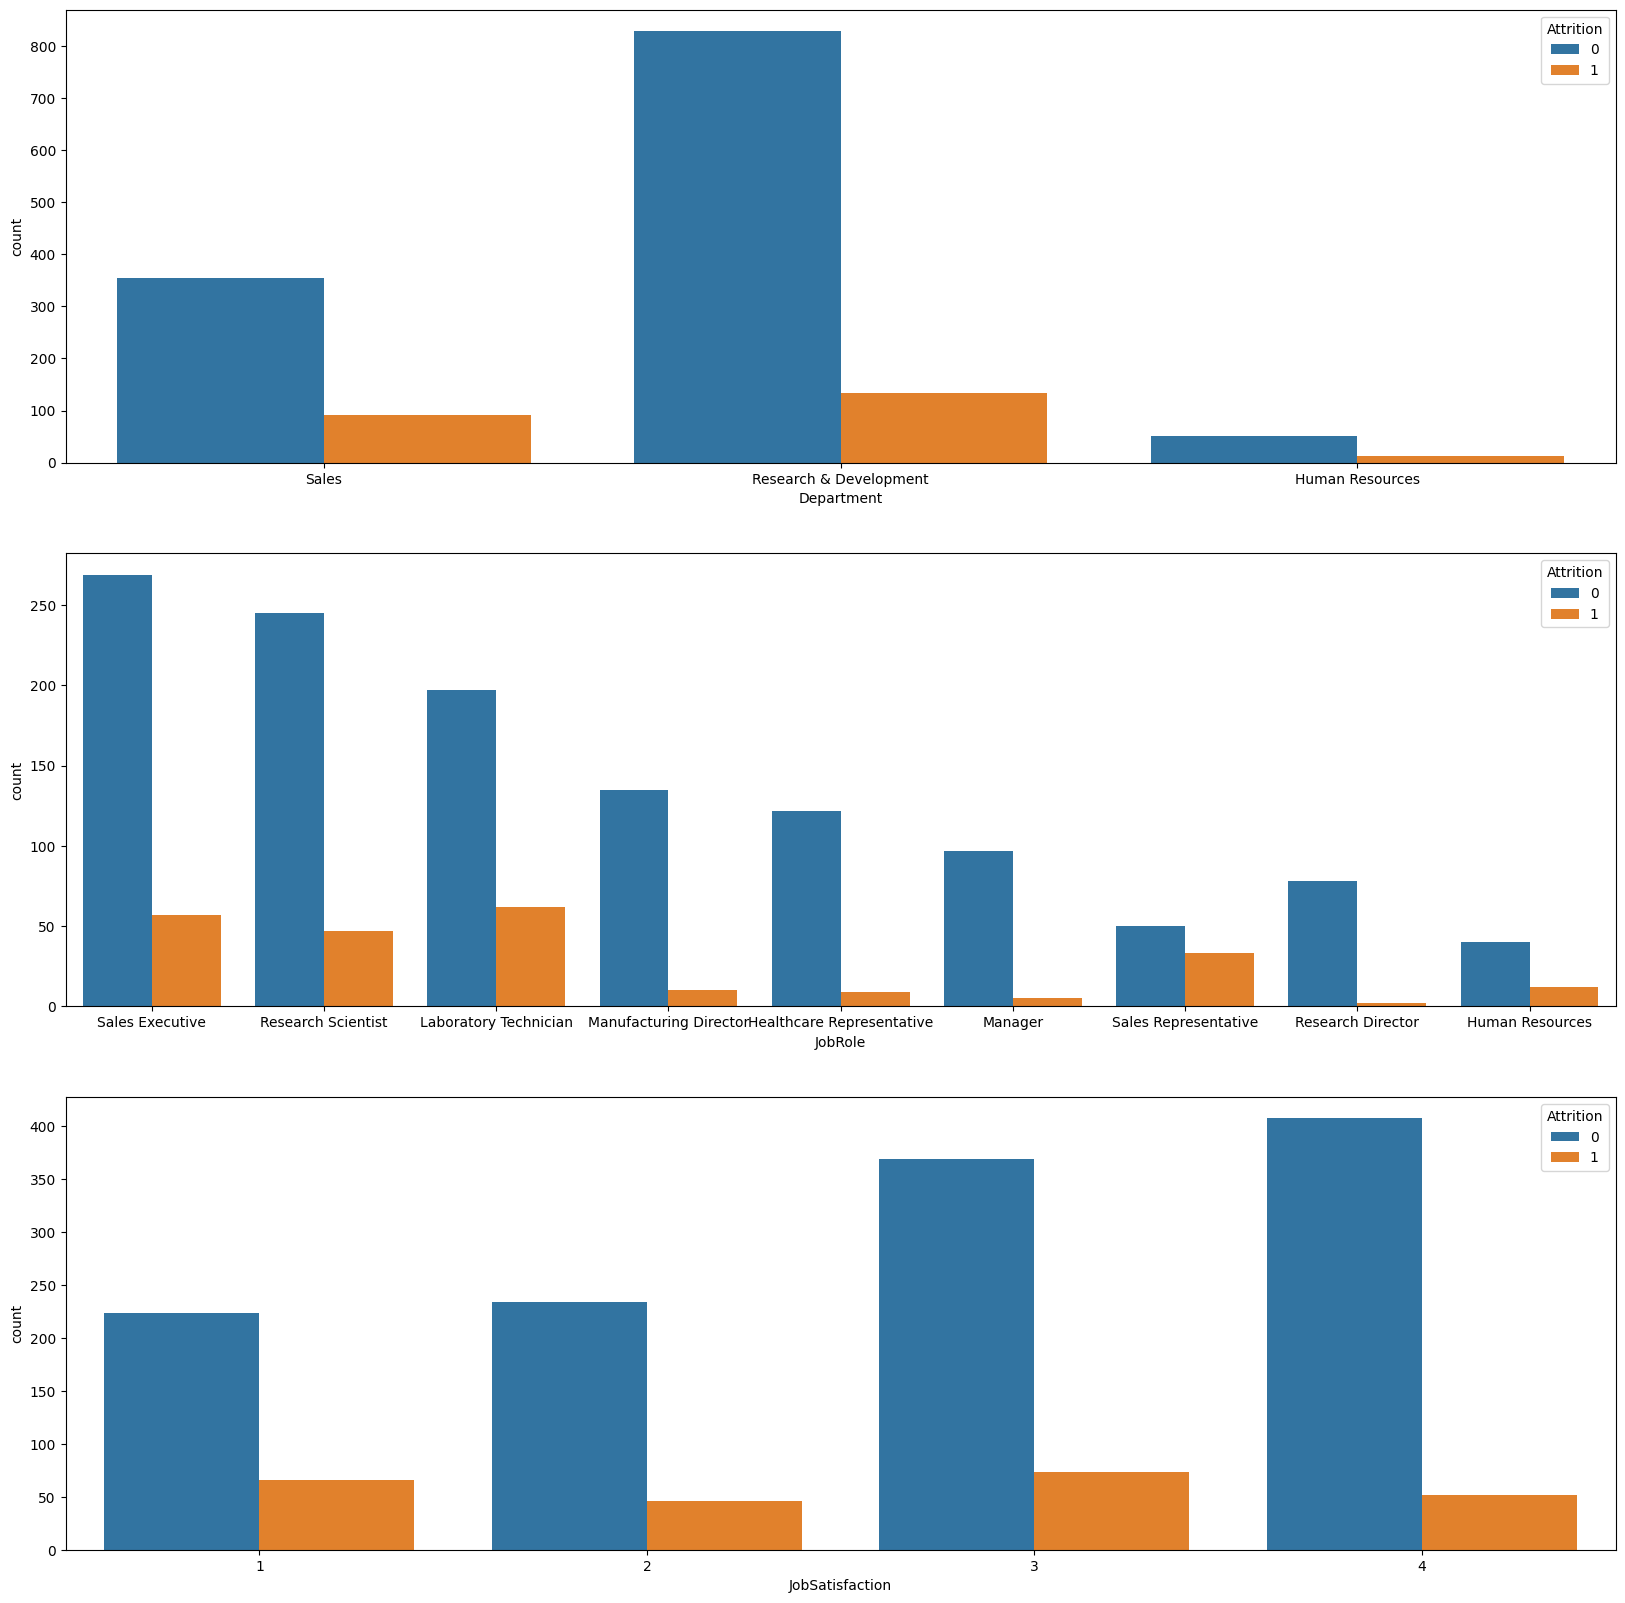

In [26]:
plt.figure(figsize=[20,20])

plt.subplot(311)
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.subplot(312)
sns.countplot(x='JobRole', hue='Attrition', data=dataset)
plt.subplot(313)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=dataset)

## Correlation matrix and Heatmap

In [27]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


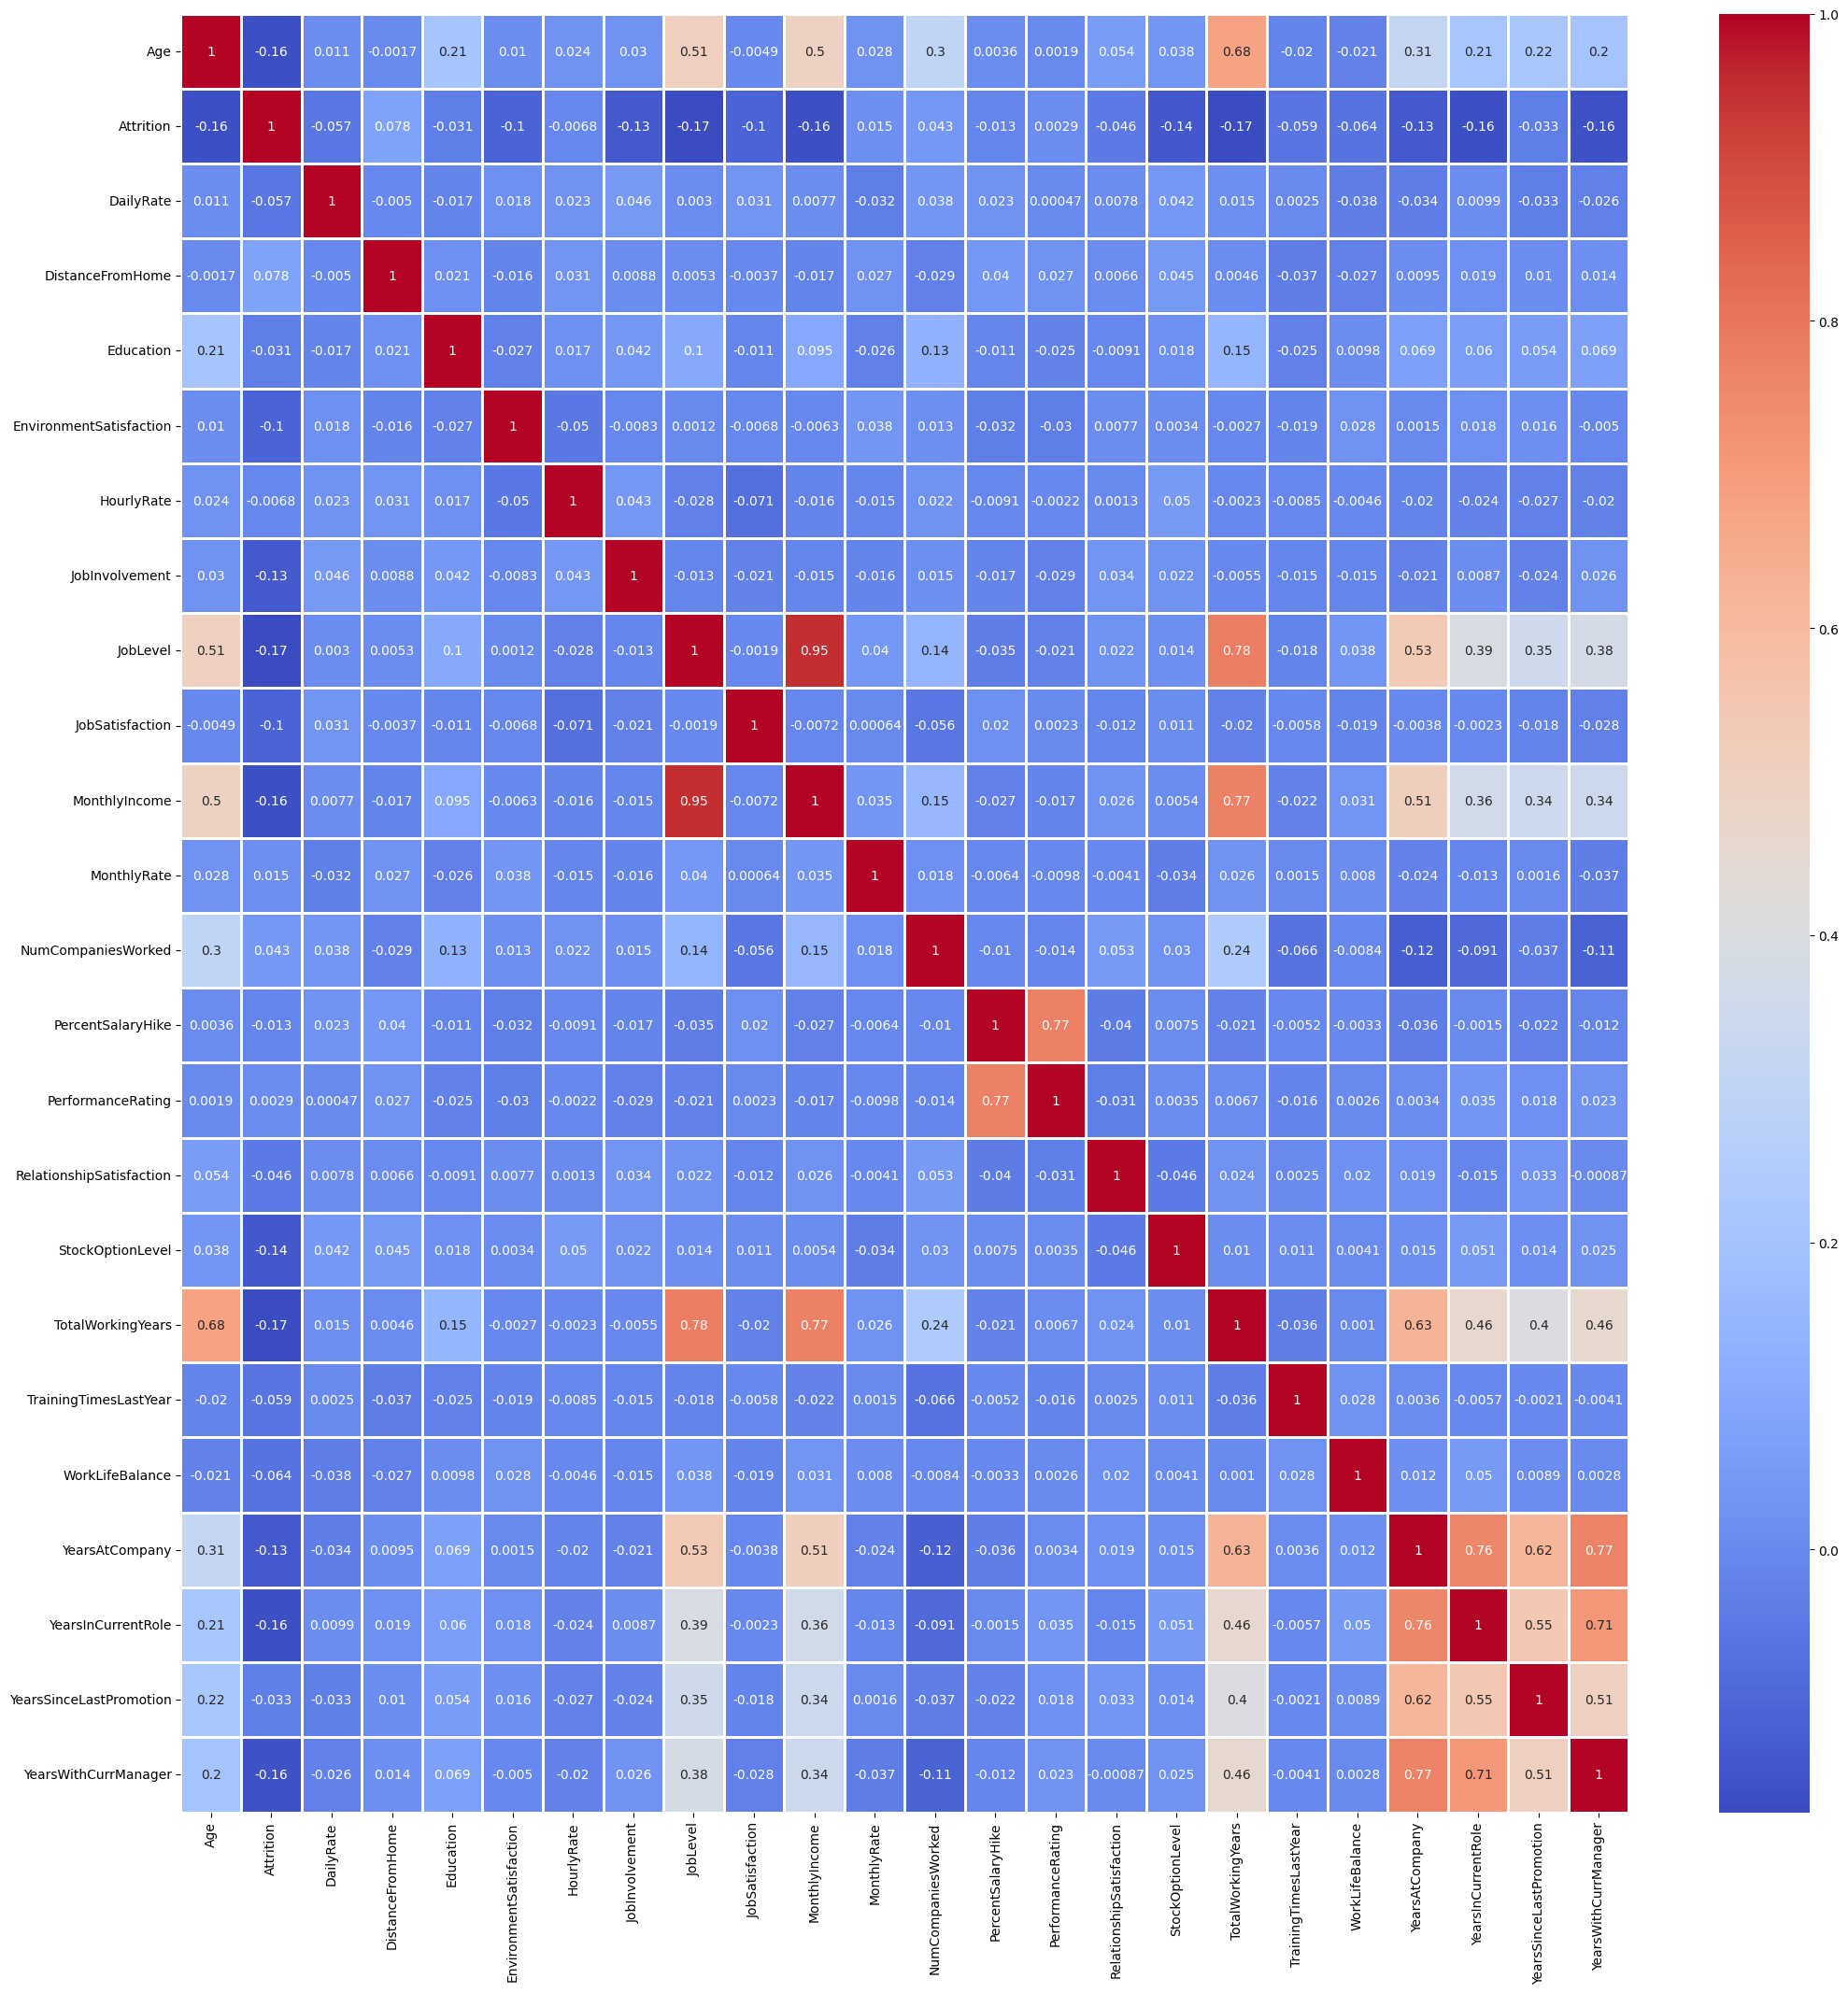

In [28]:
## Heat Map
numeric_dataset = dataset.select_dtypes(include=['number'])
corr = numeric_dataset.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(data=corr,cmap="coolwarm",annot=True,linewidths=2)

In [29]:
# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# np.zeros_like() returns an array of zeros with the same shape and type as the given array
# dtype=np.bool parameter overrides the data type, so our array is an array of booleans (true / False)

# np.triu_indices_from(mask) returns the indices for the upper triangle of the array

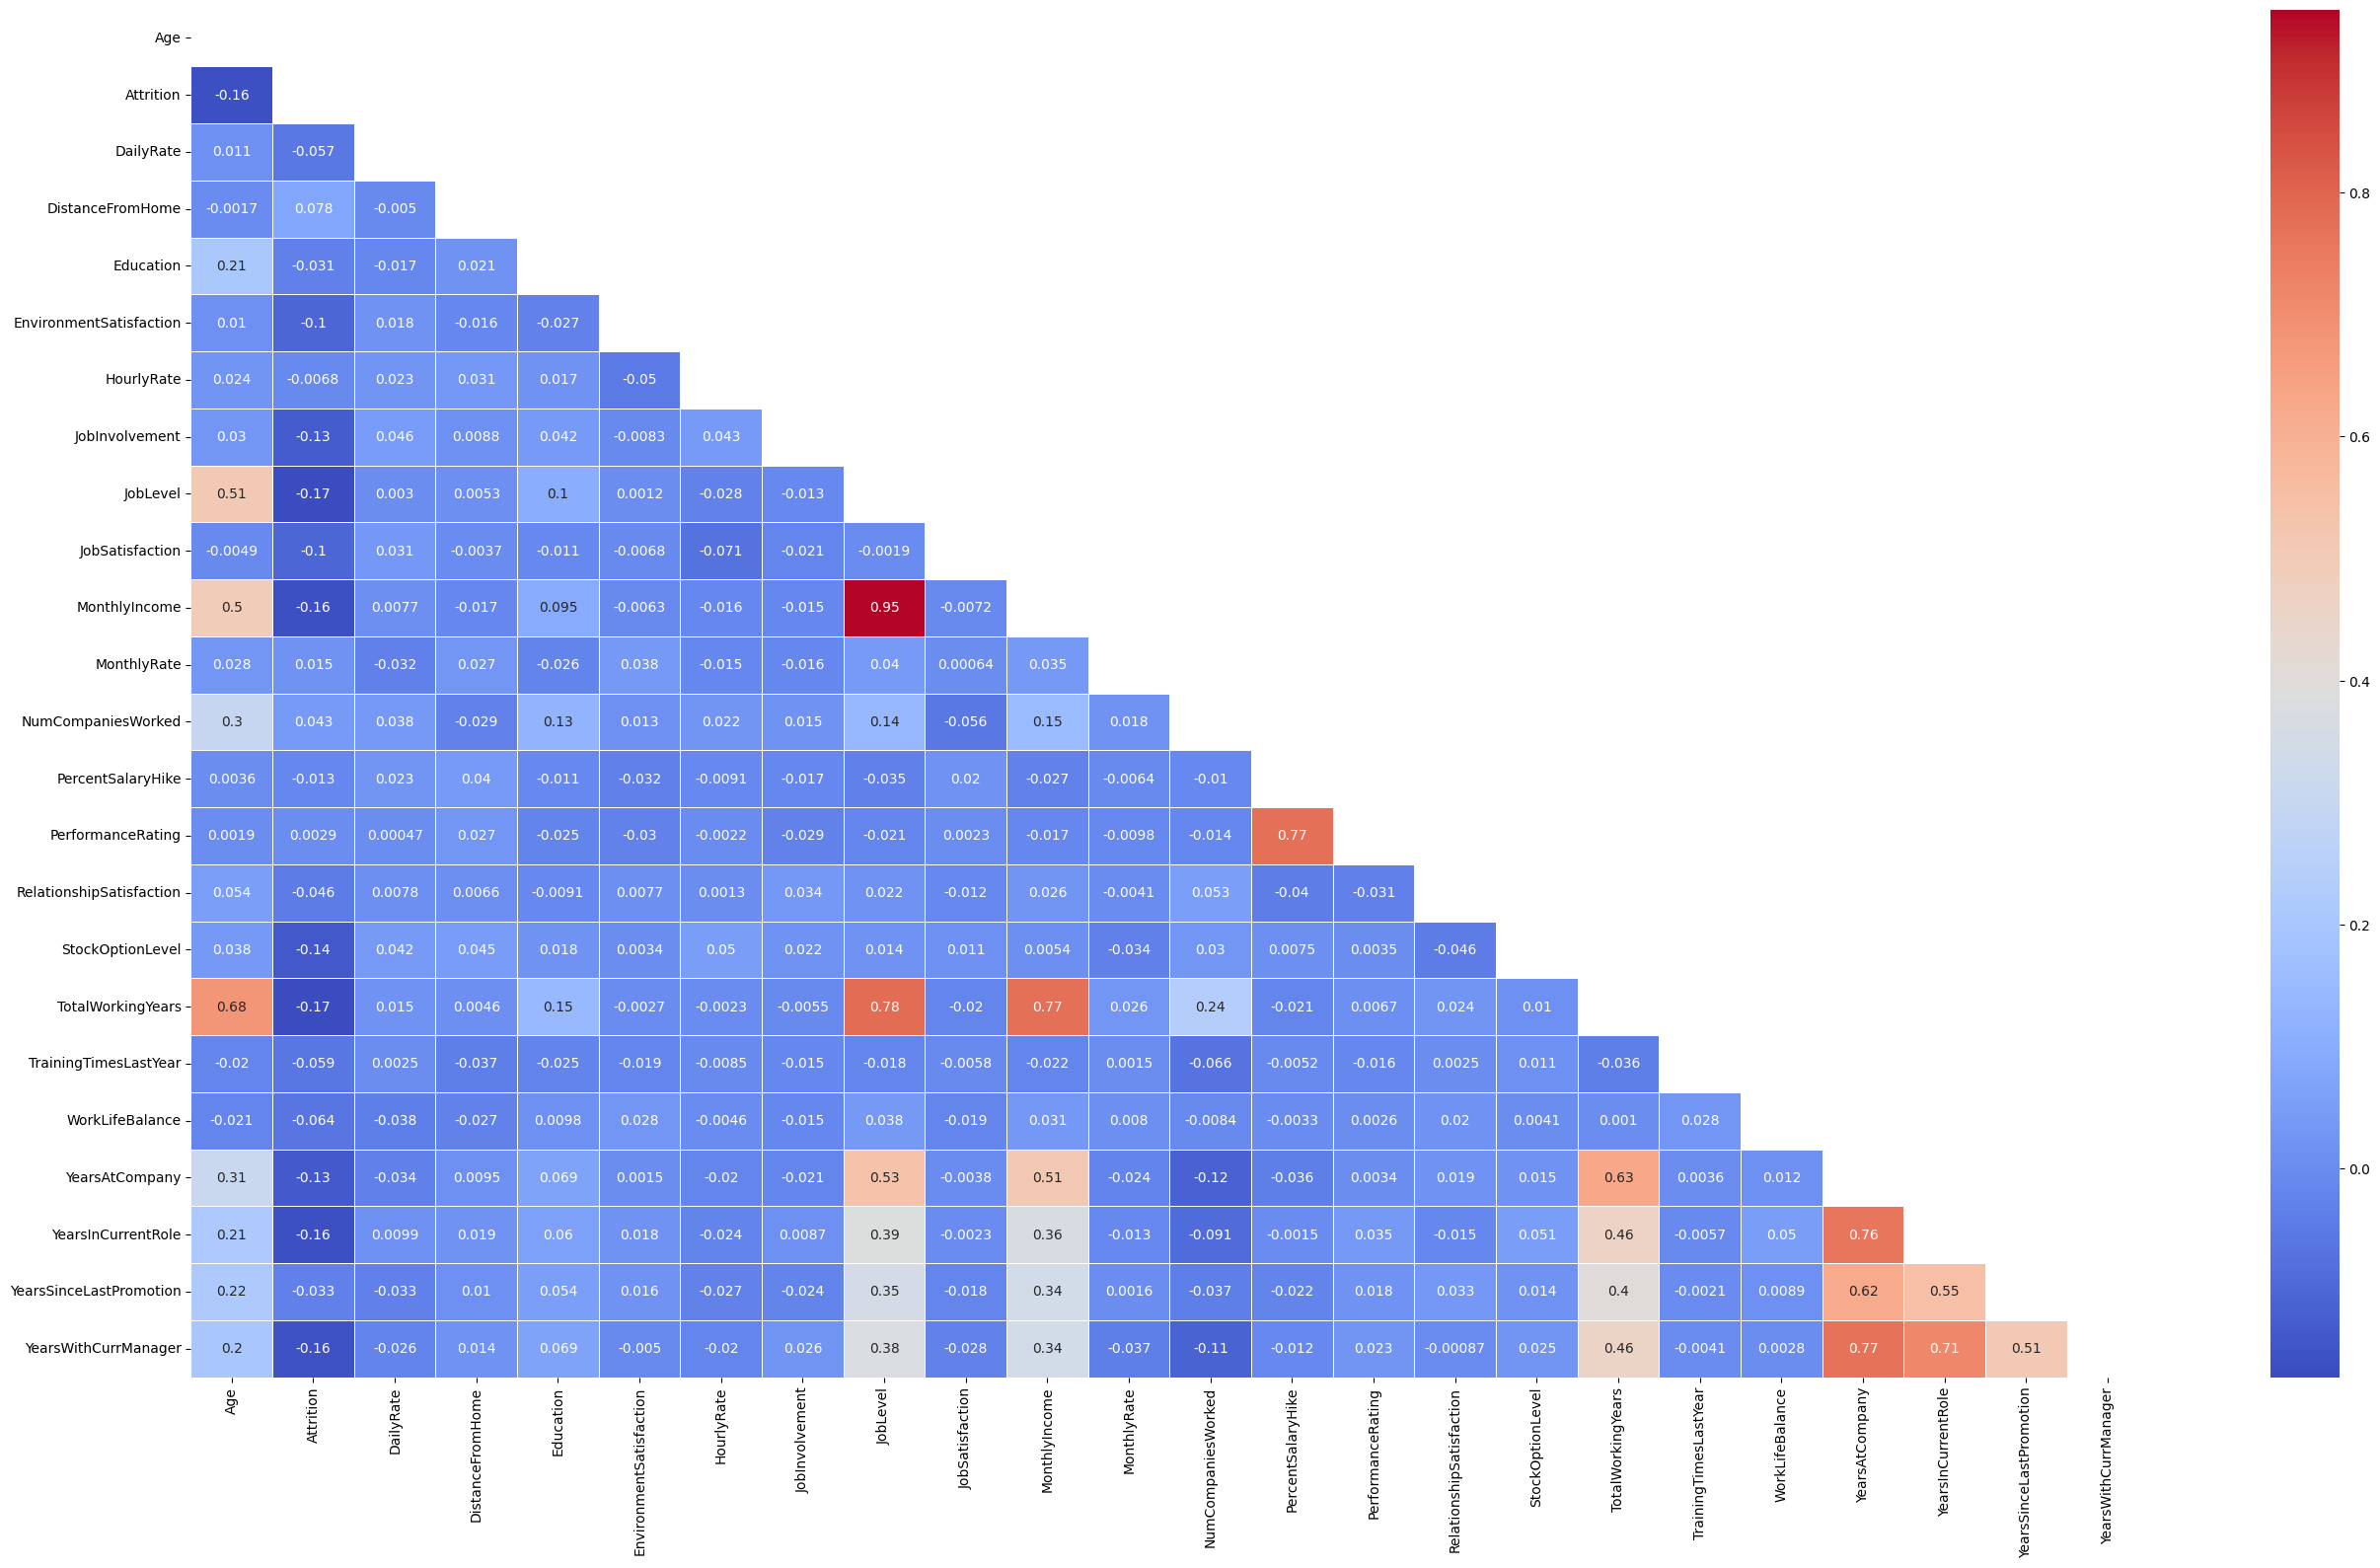

In [30]:
plt.figure(figsize=(32,18))
ax = sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, cmap = 'coolwarm')

## Dealing with categorical data

In [31]:
# categorical columns
dataset.select_dtypes(include=['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [32]:
len(dataset.select_dtypes(include=['object']).columns)

7

In [33]:
dataset.shape

(1470, 31)

In [34]:
dataset = pd.get_dummies(data=dataset, drop_first=True,dtype="int")

In [35]:
# categorical columns
dataset.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [36]:
dataset.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [37]:
dataset.shape

(1470, 45)

## Split the dataset into train and test set

In [38]:
dataset.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [39]:
dataset.rename(columns={"Attrition_Yes": "Attrition"}, inplace=True)

In [40]:
dataset.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

In [41]:
# matrix of features / independent variables
x = dataset.drop(columns='Attrition')

In [42]:
x.shape

(1470, 44)

In [43]:
# dependent variable
y = dataset['Attrition']

In [44]:
y.shape

(1470,)

In [45]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
x_train.shape

(1176, 44)

In [47]:
x_test.shape

(294, 44)

In [48]:
y_train.shape

(1176,)

In [49]:
y_test.shape

(294,)

## Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [51]:
x_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.9043263 ,  0.36465323,  2.31628752, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.23722329,  2.0703989 , ...,  1.11547067,
        -0.69900472, -0.61535643],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377, -1.31608491, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.89648256,
        -0.69900472, -0.61535643]])

In [52]:
x_test

array([[-0.08886552, -0.41164077,  0.10328995, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.41992946, -0.5595063 ,  1.94745459, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.19922017, -0.34510129,  1.08684442, ...,  1.11547067,
        -0.69900472,  1.62507442],
       ...,
       [-0.64063875, -1.36290899, -0.38848729, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377,  1.13108954, -0.88026453, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.06717794, -0.14259867, ...,  1.11547067,
        -0.69900472,  1.62507442]])

# Part 2: Building the model

## 1) Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred = classifier_lr.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [56]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_list = []
model_results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)

In [57]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.884354,0.741935,0.469388,0.575


In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[237   8]
 [ 26  23]]


## 2) Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [60]:
y_pred = classifier_rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.884354,0.741935,0.469388,0.575
1,Random Forest,0.857143,0.818182,0.183673,0.300


In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[243   2]
 [ 40   9]]


## 3) XGBoost

In [62]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [63]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.884354,0.741935,0.469388,0.575000
1,Random Forest,0.857143,0.818182,0.183673,0.300000
2,XGBoost,0.836735,0.520000,0.265306,0.351351


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[233  12]
 [ 36  13]]


# Part 3: Randomized Search to find the best parameters (Logistic regression)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [50, 100, 200, 500]
               }

In [67]:
randomized_search = RandomizedSearchCV(estimator = classifier_lr, param_distributions = parameters,
                                 n_iter = 10, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

# cv: cross-validation
# n_jobs = -1:
# Number of jobs to run in parallel. -1 means using all processors

In [68]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

[CV 2/5] END C=1.25, max_iter=200, penalty=none, solver=newton-cg;, score=0.813 total time=   0.1s
[CV 3/5] END C=1.25, max_iter=200, penalty=none, solver=newton-cg;, score=0.844 total time=   0.1s
[CV 5/5] END C=1.25, max_iter=200, penalty=none, solver=newton-cg;, score=0.783 total time=   0.1s
[CV 1/5] END C=1.25, max_iter=200, penalty=none, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=1.25, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.25, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.25, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.25, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.25, max_iter=200, penalty=none, solver=newton-cg;, score=0.834 total time=   0.1s
[CV 5/5] END C=1.25, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total tim

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

[CV 2/5] END C=1, max_iter=50, penalty=l1, solver=liblinear;, score=0.830 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=l1, solver=liblinear;, score=0.821 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=l1, solver=liblinear;, score=0.846 total time=   0.0s
[CV 1/5] END C=1.5, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.5, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.5, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=l1, solver=liblinear;, score=0.830 total time=   0.0s
[CV 4/5] END C=1.5, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.5, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=2, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=2, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total t

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.831 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.787 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=none, solver=saga;, score=0.814 total time=   0.4s
[CV 1/5] END C=0.5, max_iter=500, penalty=none, solver=saga;, score=0.798 total time=   0.4s
[CV 4/5] END C=0.5, max_iter=500, penalty=none, solver=saga;, score=0.833 total time=   0.4s
[CV 3/5] END C=0.5, max_iter=500, penalty=none, solver=saga;, score=0.844 total time=   0.4s
[CV 5/5] END C=0.5, max_iter=500, penalty=none, solver=saga;, sc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Libr

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                              1.75, 2],
                                        'max_iter': [50, 100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [69]:
randomized_search.best_estimator_

LogisticRegression(C=1, max_iter=50, penalty='l1', random_state=0,
                   solver='liblinear')

In [70]:
randomized_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 50, 'C': 1}

In [71]:
randomized_search.best_score_

0.8221745073468292

# Part 4: Final Model (Logistic regression)

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.5, max_iter=500, penalty='l1', random_state=0,
                   solver='saga')

In [73]:
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results= pd.DataFrame([['Final(Logistic Regression)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.884354,0.741935,0.469388,0.575000
1,Random Forest,0.857143,0.818182,0.183673,0.300000
2,XGBoost,0.836735,0.520000,0.265306,0.351351
3,Final(Logistic Regression),0.884354,0.741935,0.469388,0.575000


In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[237   8]
 [ 26  23]]


## k-fold cross validation

In [75]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 88.01 %
Standard Deviation is 2.59 %


# Part 6: Predicting a single observation

In [76]:
dataset.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [77]:
single_obs = [[41, 1102,	1, 2,	2,	94,	3,	2,	4,	5993,	19479,	8,	11,	3,	1,	0,	8,	0,	1,	6,	4,	0,	5,
               0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1]]

In [78]:
print(classifier.predict(sc.transform(single_obs)))
# leave the company

[1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
